In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Cargar el dataset
file_path = '/content/drive/MyDrive/TFM/qualifying_1960-2024.csv'
df = pd.read_csv(file_path)
# Especificar las columnas que quieres seleccionar
columnas_deseadas = ['home_team', 'away_team', 'home_score', 'away_score', 'winner', 'winner_reason', 'year', 'status', 'round', 'condition_humidity', 'condition_pitch', 'condition_temperature',	'condition_weather', 'condition_wind_speed']

# Crear un nuevo DataFrame con estas columnas
# ... (resto del código para crear el DataFrame)
df1 = df[columnas_deseadas]

# Eliminar las filas donde las variables especificadas son NaN
variables_to_check = ['condition_pitch', 'condition_temperature', 'condition_weather', 'condition_wind_speed']
df1 = df1.dropna(subset=variables_to_check)

#reemplazar nombres
df1 = df1.replace({"German Dem. Rep.": "Germany", "GDR": "GER", "USSR": "Russia","URS": "RUS","FINAL_TOURNAMENT_PLAY_OFF": "FINAL","Northern Ireland":"Ireland", "Republic of Ireland":"Ireland","NIR":"IRL"})

# Añadir una nueva columna 'score_dif' que calcule la resta entre 'home_score' y 'away_score'
df1['score_dif'] = df1['home_score'] - df1['away_score']

# Añadir una nueva columna booleana 'home_winner' donde es True si 'score_dif' es positivo, de lo contrario False
df1['home_winner'] = df1['score_dif'] > 0 #damos empate como pérdida

# Eliminar las filas donde la columna 'status' es "cancelled"
df1 = df1[df1['status'] == 'FINISHED']

# Guardar el nuevo DataFrame
nuevo_file_path = 'qualifying_1960-2024_3.csv'
df1.to_csv(nuevo_file_path, index=False)

print(f"El nuevo archivo con las columnas seleccionadas se ha guardado en: {nuevo_file_path}")

El nuevo archivo con las columnas seleccionadas se ha guardado en: qualifying_1960-2024_3.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df1.shape

(475, 16)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 1828 to 2786
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   home_team              475 non-null    object 
 1   away_team              475 non-null    object 
 2   home_score             475 non-null    float64
 3   away_score             475 non-null    float64
 4   winner                 400 non-null    object 
 5   winner_reason          475 non-null    object 
 6   year                   475 non-null    int64  
 7   status                 475 non-null    object 
 8   round                  475 non-null    object 
 9   condition_humidity     104 non-null    float64
 10  condition_pitch        475 non-null    object 
 11  condition_temperature  475 non-null    float64
 12  condition_weather      475 non-null    object 
 13  condition_wind_speed   475 non-null    float64
 14  score_dif              475 non-null    float64
 15  home_wi

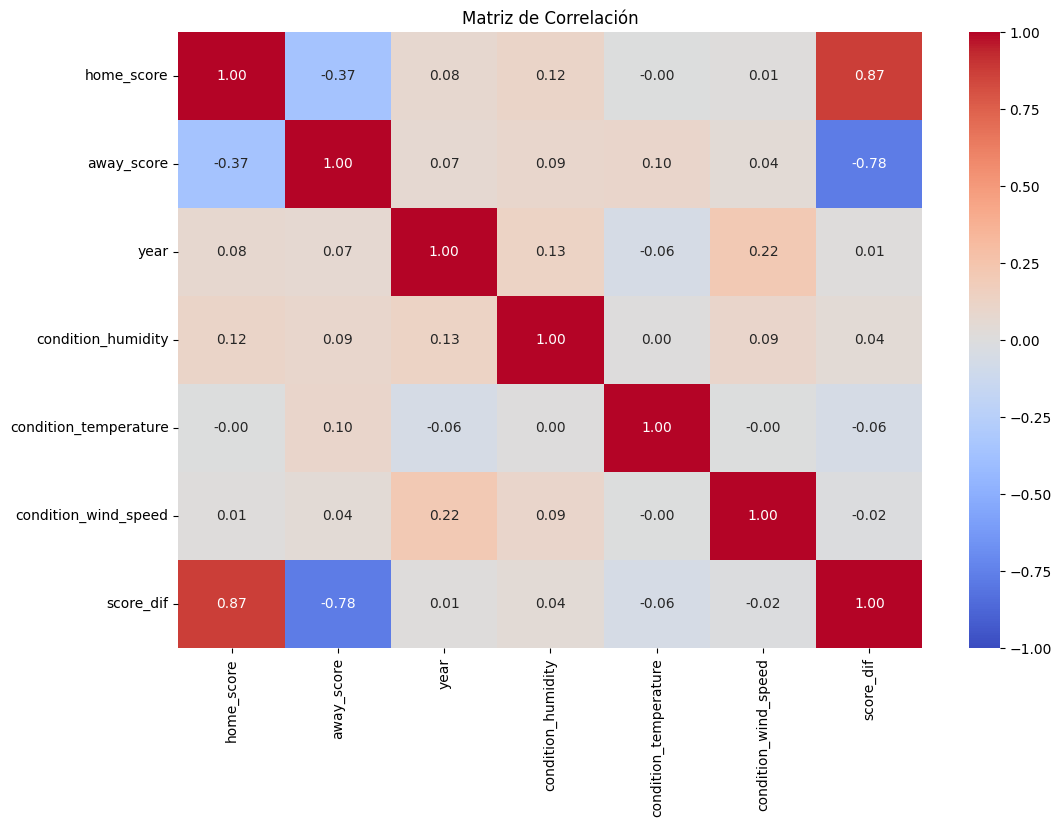

In [9]:
# seleccionar solo las columnas numericas para calcular la correlacion
numerical_df = df1.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numerical_df.corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [10]:
# Seleccionar las columnas de interés
X = df1[['home_team', 'away_team', 'home_score', 'away_score', 'winner', 'winner_reason', 'year', 'status', 'round', 'condition_humidity', 'condition_pitch', 'condition_temperature',	'condition_weather', 'condition_wind_speed']]  # Características
y = df1['home_winner']  # Variable objetivo

In [14]:
# Convertir las variables categóricas en variables numéricas usando OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['home_team', 'away_team', 'round']])

# Convertir el resultado de OneHotEncoder a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP

In [21]:
# Crear el modelo de MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenar el modelo
MLP.fit(X_train, y_train)

# Hacer predicciones
y_pred = MLP.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7894736842105263
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.83      0.80        47
        True       0.82      0.75      0.78        48

    accuracy                           0.79        95
   macro avg       0.79      0.79      0.79        95
weighted avg       0.79      0.79      0.79        95



# RFC

In [26]:
# Crear el modelo de RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
RFC.fit(X_train, y_train)

# Hacer predicciones
y_pred = RFC.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7368421052631579
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.74      0.74        47
        True       0.74      0.73      0.74        48

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95



# LogReg

In [27]:
# Crear el modelo de Logistic Regression
Logistic_Regression = LogisticRegression(random_state=42)

# Entrenar el modelo
Logistic_Regression.fit(X_train, y_train)

# Hacer predicciones
y_pred = Logistic_Regression.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7789473684210526
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.83      0.79        47
        True       0.81      0.73      0.77        48

    accuracy                           0.78        95
   macro avg       0.78      0.78      0.78        95
weighted avg       0.78      0.78      0.78        95



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


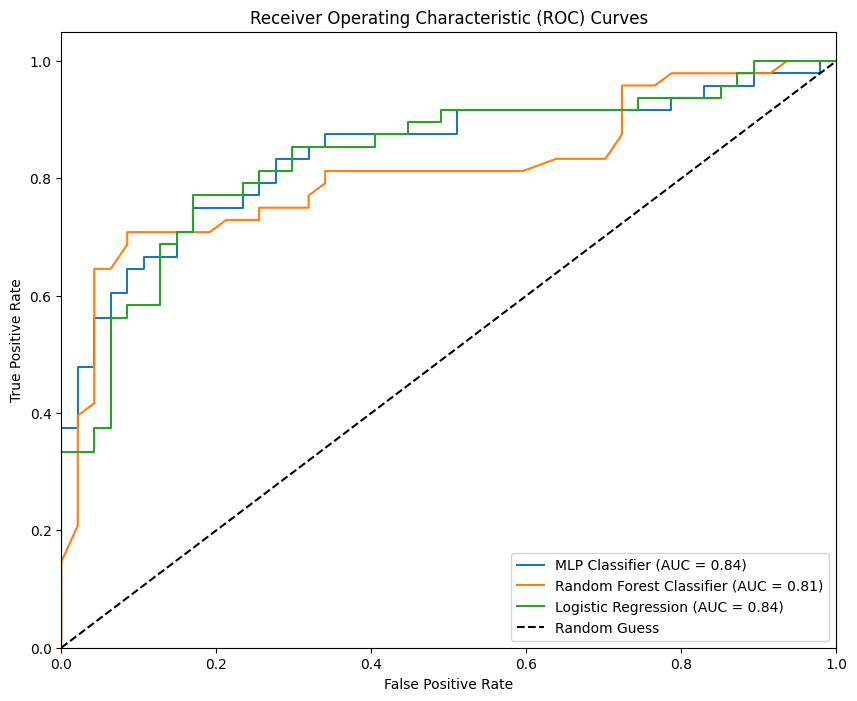

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Crear y entrenar los modelos
models = {
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

# Función para plotear las curvas ROC
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Plotear las curvas ROC de los tres modelos
plot_roc_curves(models, X_test, y_test)